# Exploratory data analysis

# Energy Efficiency Analysis and Heating Load Prediction
<figure>
    <img src="Energy_gains_and_losses_through_building.jpg" alt="heat load sketch" width="400"/>
    <figcaption align="center">Source: https://en.wikipedia.org/wiki/File:Energy_gains_and_losses_through_building.jpg</figcaption>
</figure>

## Objective: Predicting the Heating Load of Buildings

As global concerns about climate change and the escalating energy costs grow, understanding and enhancing the energy efficiency of buildings has become a pivotal focus. In this project, I aim to analyze and predict the heat load of a building based on various building characteristics.

## Dataset Description

The dataset provided for this project is a tabular dataset that includes 8 distinct building features. These features will serve as input variables to predict the "Heating Load" of the building. The "Heat load" represents the amount of heating required to maintain the indoor temperature at established levels.

You can download the dataset from Kaggle. 

* https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset

The features are denoted as X1 to X8, and the target variable is denoted as y1.

**Note**: The dataset also contains another predictable variable: y2, the "Cooling Load." The cooling load refers to the amount of heat energy that needs to be removed from a space to maintain an acceptable temperature range. However, for the purpose of this project, we will solely focus on predicting the "Heating Load."

## Building Features:
* X1 Relative Compactness:
    This feature represents the volume-to-surface ratio of the building. Buildings with lower compactness have a larger surface area relative to their volume.

* X2 Surface Area ($m^2$):
    
    This feature denotes the total surface area of the building in square meters.

* X3 Wall Area ($m^2$):

    The wall area feature represents the total surface area of the walls in square meters.

* X4 Roof Area ($m^2$):
    
    The roof area feature indicates the total surface area of the roof in square meters.

* X5 Overall Height ($m$):

    This feature specifies the overall height of the building in meters.

* X6 Orientation:
    This categorical feature denotes the building's orientation, where:
    * 2: North
    * 3: East
    * 4: South
    * 5: West

* X7 Glazing Area:

    This feature represents the area of transparent material, excluding the window frame, as a percentage of the floor area. It takes the following values:
    * 0%
    * 10%
    * 25%
    * 40%

* X8 Glazing Area Distribution (Variance):This categorical feature describes the variance in glazing area distribution across different building orientations, where:
    * 1: Uniform
    * 2: North
    * 3: East
    * 4: South
    * 5: West

## Target Variable:

* Y1 Heating Load ($kWh/m²$):

    The "Heating Load" is measured in kilowatt-hours per square meter (kWh/m²) and represents the amount of heating required to maintain the indoor temperature within the building.

In this project, I will develop a predictive model using Python and various Machine Learning libraries to accurately forecast the Heating Load of buildings based on the provided features. Let's dive into the exciting world of energy efficiency analysis and prediction!

## Required Packages

Before running this notebook, ensure that you have the following Python packages installed. If you don't have them already, you can install them using the Python package manager, pip.


In [2]:
import os
import pandas as pd
import numpy as np
import math

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Data load

Read the data from a csv file.

In [3]:
path = "data"
data = pd.read_csv(os.path.join(path, "ENB2012_data.csv"))

## Data Overview

Let's start by gaining an initial understanding of the dataset:

1. **Number of Instances:** Determine the total number of instances (data points) present in the dataset.

2. **Presence of Missing Values:** Investigate whether there are any missing values within the dataset.

3. **Data Types:** Examine the types of data associated with each feature in the dataset.

4. **Range of Feature Values:** Explore the minimum and maximum values for each feature to understand their data range.

Now, let's proceed with the exploration:

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Rename the columns for a better overview about th features.

In [6]:
data = data.rename(
    columns={
        "X1": "relative_compactnes",
        "X2": "surface_area",
        "X3": "wall_area",
        "X4": "roof_area",
        "X5": "overall_height",
        "X6": "orientation",
        "X7": "glazing_area",
        "X8": "glazing_area_distribution",
        "Y1": "heating_load",
        "Y2": "cooling_load",
    }
)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactnes        768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
# how many unique values contains each column
data.nunique()

relative_compactnes           12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 586
cooling_load                 636
dtype: int64

In [8]:
# general statistic information about all columns in the dataframe
data.describe()

,relative_compactnes,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Observations:**

After conducting an initial data overview, the following observations were made:

* The dataset contains a total of 768 instances.
* There are no missing values in the dataset, ensuring a complete dataset for analysis.
* The data types of the features consist of both integer and float values. However, it's worth noting that the features "orientation" and "glazing_area_distribution" should be converted to the `string` data type to facilitate one-hot encoding in later stages of modeling.
* The features exhibit different numerical ranges, indicating the need for normalization before proceeding with the modeling process. Standardizing the features will ensure a fair comparison and prevent any bias towards particular features during model training.

These observations provide essential insights that will guide us in the subsequent steps of data preprocessing and modeling to build an accurate predictive model for the heating load of buildings.

In [9]:
# change data type from integer to string for categorical features
data[["orientation", "glazing_area_distribution"]] = data[
    ["orientation", "glazing_area_distribution"]
].astype("string")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactnes        768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    string 
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    string 
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), string(2)
memory usage: 60.1 KB


## Plot Distributions of Features and Target

To gain a deeper insight into the data, we will visualize the distributions of each individual column, including the target variable. The purpose of this visualization is to provide a better understanding of the characteristics and patterns present in the dataset.

The features to be plotted are as follows:

1. **X1 Relative Compactness**
2. **X2 Surface Area**
3. **X3 Wall Area**
4. **X4 Roof Area**
5. **X5 Overall Height**
6. **X6 Orientation**
7. **X7 Glazing Area**
8. **X8 Glazing Area Distribution**

Additionally, we will plot the distribution of the target variable:

- **Y1 Heating Load**

The plots will include histograms, and where applicable, kernel density estimations (KDE), to visualize the data distribution of each column.

Let's proceed with the visualization to gain valuable insights into the dataset.
```

In [10]:
# Define a function to plot the distribution of each feature
def plot_distribution(dataset, cols=3, width=20, height=25, hspace=0.5, wspace=0.2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace
    )
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == "string":
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xlim([0, 200])
            plt.xticks(rotation=25)
        else:
            g = sns.histplot(dataset[column])
            plt.xticks(rotation=25)

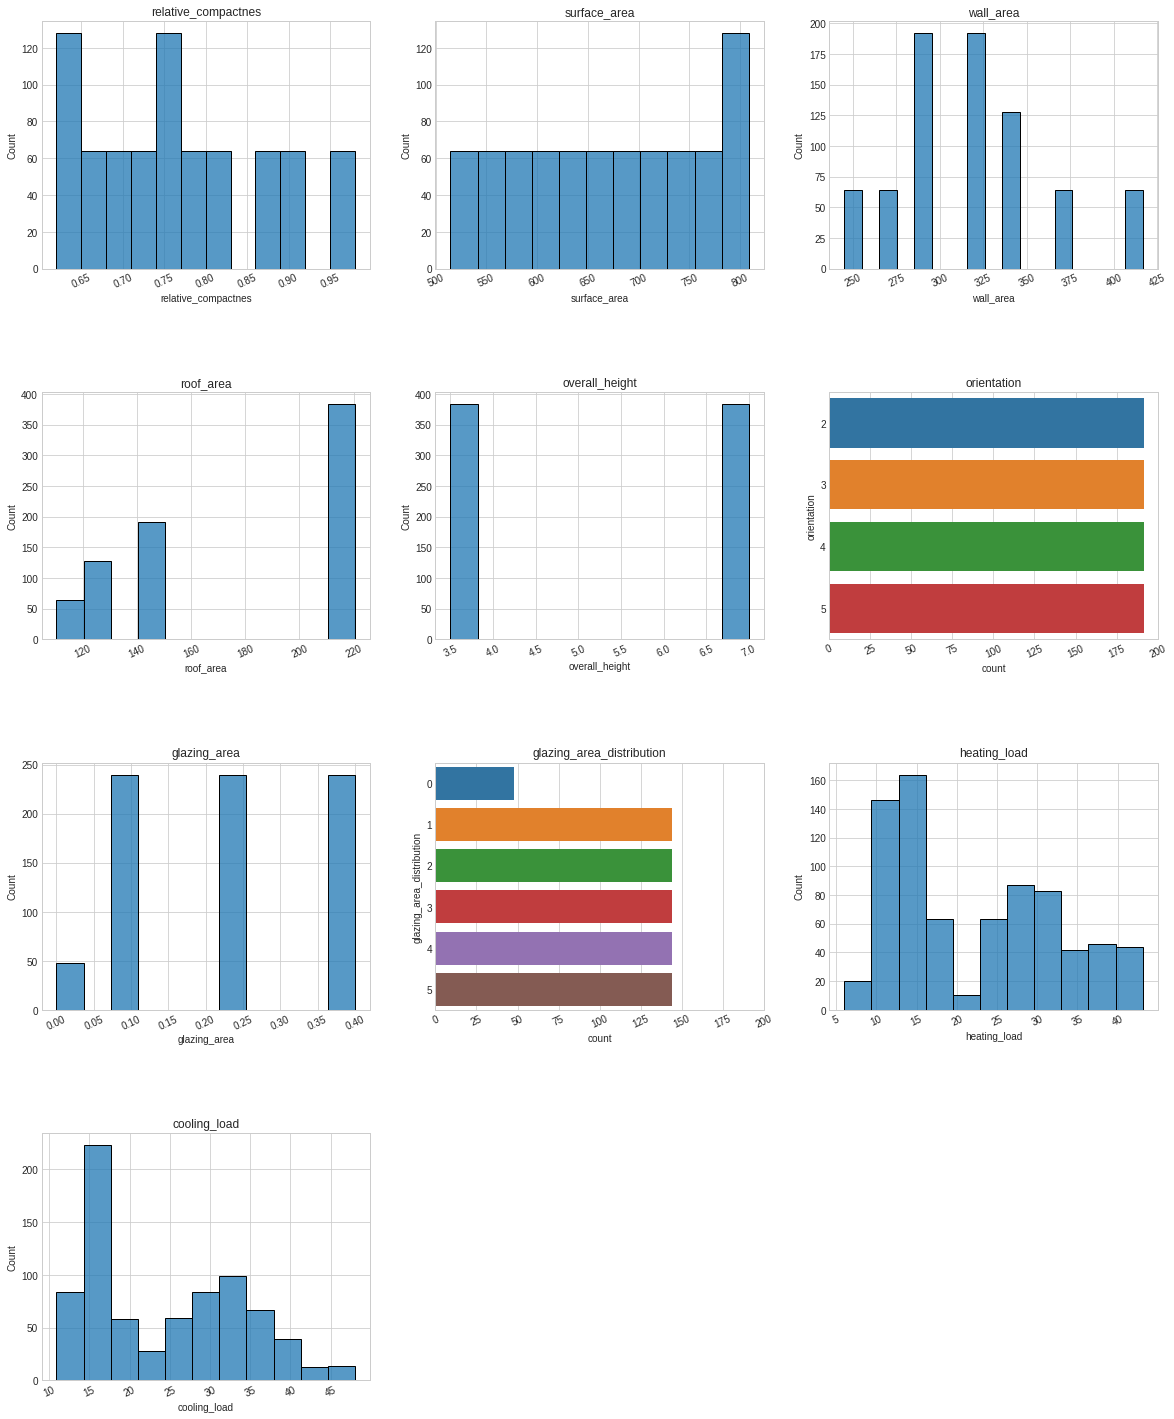

In [11]:
plot_distribution(data)

**Observations**

Upon analyzing the distributions of features and the target variable, the following observations were made:

1. **Target Variable (Heating Load):** The "heating_load" target variable is not normally distributed. Similarly, the second variable "cooling_load" also exhibits a non-normal distribution.

2. **Categorical Variables:** The categorical variables, particularly "orientation" and "glazing_area_distribution," demonstrate an equal distribution across their respective categories. However, there is an exception for the value `0` in the "glazing_area_distribution," indicating that it may have a different distribution pattern compared to the other categories.

These observations provide essential insights into the data's distribution patterns, which will be valuable for subsequent steps of data preprocessing and selecting appropriate modeling techniques to predict the heating load of buildings.

## Correlations between features and Target

/tmp/ipykernel_7610/3042388779.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = data.corr()


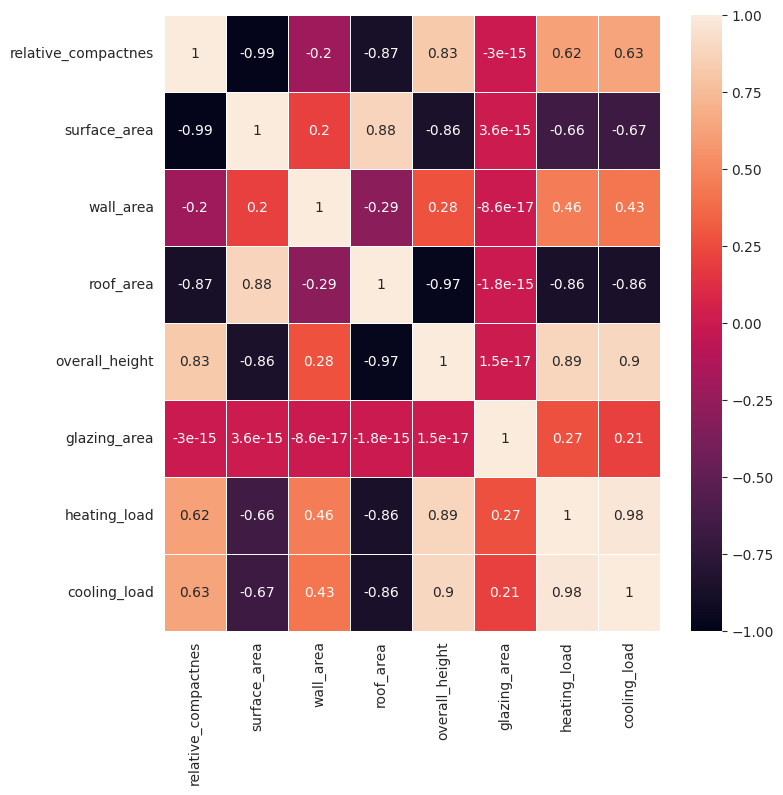

In [11]:
cm = data.corr()
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(cm, annot=True, linewidths=0.5, vmin=-1, vmax=1)

**Observations**

After conducting a correlation analysis, the following observations were made:

1. **Correlation between Target Variables:** Both target variables, "heating_load" and "cooling_load," exhibit a high correlation. This indicates that the two variables are strongly related to each other.

2. **High Correlation between "surface_area" and "relative_compactness":** The features "surface_area" and "relative_compactness" show a high correlation. This finding is not surprising, as the relative compactness is derived from the "surface_area" calculation.

3. **Low Correlation of "glazing_area" with Other Features and Target Variables:** The feature "glazing_area" demonstrates low correlation with the other features in the dataset and also exhibits a low correlation with the target variables. This suggests that "glazing_area" may have limited impact on the heating and cooling load predictions.

These observations shed light on the interrelationships between different features and target variables, providing valuable insights for the subsequent stages of data analysis and modeling.

## Prepare Modeling

As this is a multivariate regression problem, we need to undertake the following steps to prepare the data for modeling:

1. **Define Features and Target Variables:** Identify the features (independent variables) and the target variable (dependent variable) for the regression model.

2. **Define Train, Validation, and Test Sets:** Split the dataset into train, validation, and test sets. The train set will be used for model training, the validation set for hyperparameter tuning, and the test set to evaluate the final model performance.

3. **Normalize the Data:** Standardize the feature data to ensure all features are on the same scale. This prevents any feature from dominating the model due to differences in their magnitude.

4. **One-Hot Encoding for Categorical Data:** Convert categorical variables, such as "orientation" and "glazing_area_distribution," into binary representation through one-hot encoding. This enables us to incorporate these categorical features into the regression model effectively.

5. **Plot Distributions of Train and Validation Sets:** Visualize the distributions of the train and validation sets to ensure they exhibit similar characteristics, avoiding any significant data distribution differences between the two sets.

6. **Define Evaluation Metric:** Establish the evaluation metric to assess the performance of the regression model. Common metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).

By completing these preparation steps, we will be well-equipped to build and evaluate the multivariate regression model for predicting the heating load of buildings accurately.
```

In [12]:
# Define features and target variables (from now on, I will only consider "heating_load" as target)
features = [
    "relative_compactnes",
    "surface_area",
    "wall_area",
    "roof_area",
    "overall_height",
    "orientation",
    "glazing_area",
    "glazing_area_distribution",
]
target = "heating_load"

### Train- / Validation- / Test Sets

In [13]:
# trian-/ val-/ test-split
data_train_full, data_test = train_test_split(
    data[features + [target]], test_size=0.2, random_state=42
)
data_train, data_val = train_test_split(
    data_train_full[features + [target]], test_size=0.25, random_state=42
)

In [23]:
# reset indices
data_train_full = data_train_full.reset_index(drop=True)
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [24]:
# check dataframes
print(f"train full data length {len(data_train_full)}")
print(f"train data length {len(data_train)}")
print(f"val data length {len(data_val)}")
print(f"test data length {len(data_test)}")

train full data length 614
train data length 460
val data length 154
test data length 154


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactnes        460 non-null    float64
 1   surface_area               460 non-null    float64
 2   wall_area                  460 non-null    float64
 3   roof_area                  460 non-null    float64
 4   overall_height             460 non-null    float64
 5   orientation                460 non-null    string 
 6   glazing_area               460 non-null    float64
 7   glazing_area_distribution  460 non-null    string 
 8   heating_load               460 non-null    float64
dtypes: float64(7), string(2)
memory usage: 32.5 KB


### One-Hot Encoding

In [26]:
# define numerical and categorical features
numerical = [
    "relative_compactnes",
    "surface_area",
    "wall_area",
    "roof_area",
    "overall_height",
    "glazing_area",
]
categorical = ["orientation", "glazing_area_distribution"]

In [27]:
# normalize numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(data_train[numerical])
X_val_num = scaler.transform(data_val[numerical])
print(f"numerical train data shape {X_train_num.shape}")
print(f"numerical val data shape {X_train_num.shape}")

numerical train data shape (460, 6)
numerical val data shape (460, 6)


In [28]:
# one-hot-encoding
train_dicts = data_train[categorical].to_dict(orient="records")
val_dicts = data_val[categorical].to_dict(orient="records")

dv = DictVectorizer(sparse=False)  # don't use sparse matrix
dv.fit(train_dicts)
X_train_cat = dv.transform(train_dicts)
X_val_cat = dv.transform(val_dicts)
print(f"categorical train data shape {X_train_cat.shape}")
print(f"categorical val data shape {X_train_cat.shape}")

categorical train data shape (460, 10)
categorical val data shape (460, 10)


In [30]:
# new feature names
dv.get_feature_names_out()

array(['glazing_area_distribution=0', 'glazing_area_distribution=1',
       'glazing_area_distribution=2', 'glazing_area_distribution=3',
       'glazing_area_distribution=4', 'glazing_area_distribution=5',
       'orientation=2', 'orientation=3', 'orientation=4', 'orientation=5'],
      dtype=object)

In [31]:
# concatenate numerical and categorical features
X_train = np.concatenate((X_train_num, X_train_cat), axis=1)
X_val = np.concatenate((X_val_num, X_val_cat), axis=1)
print(f"train data shape {X_train.shape}")
print(f"val data shape {X_train.shape}")

train data shape (460, 16)
val data shape (460, 16)


### Plot Feature and Target Distributions

Feature distributions of training and validation data

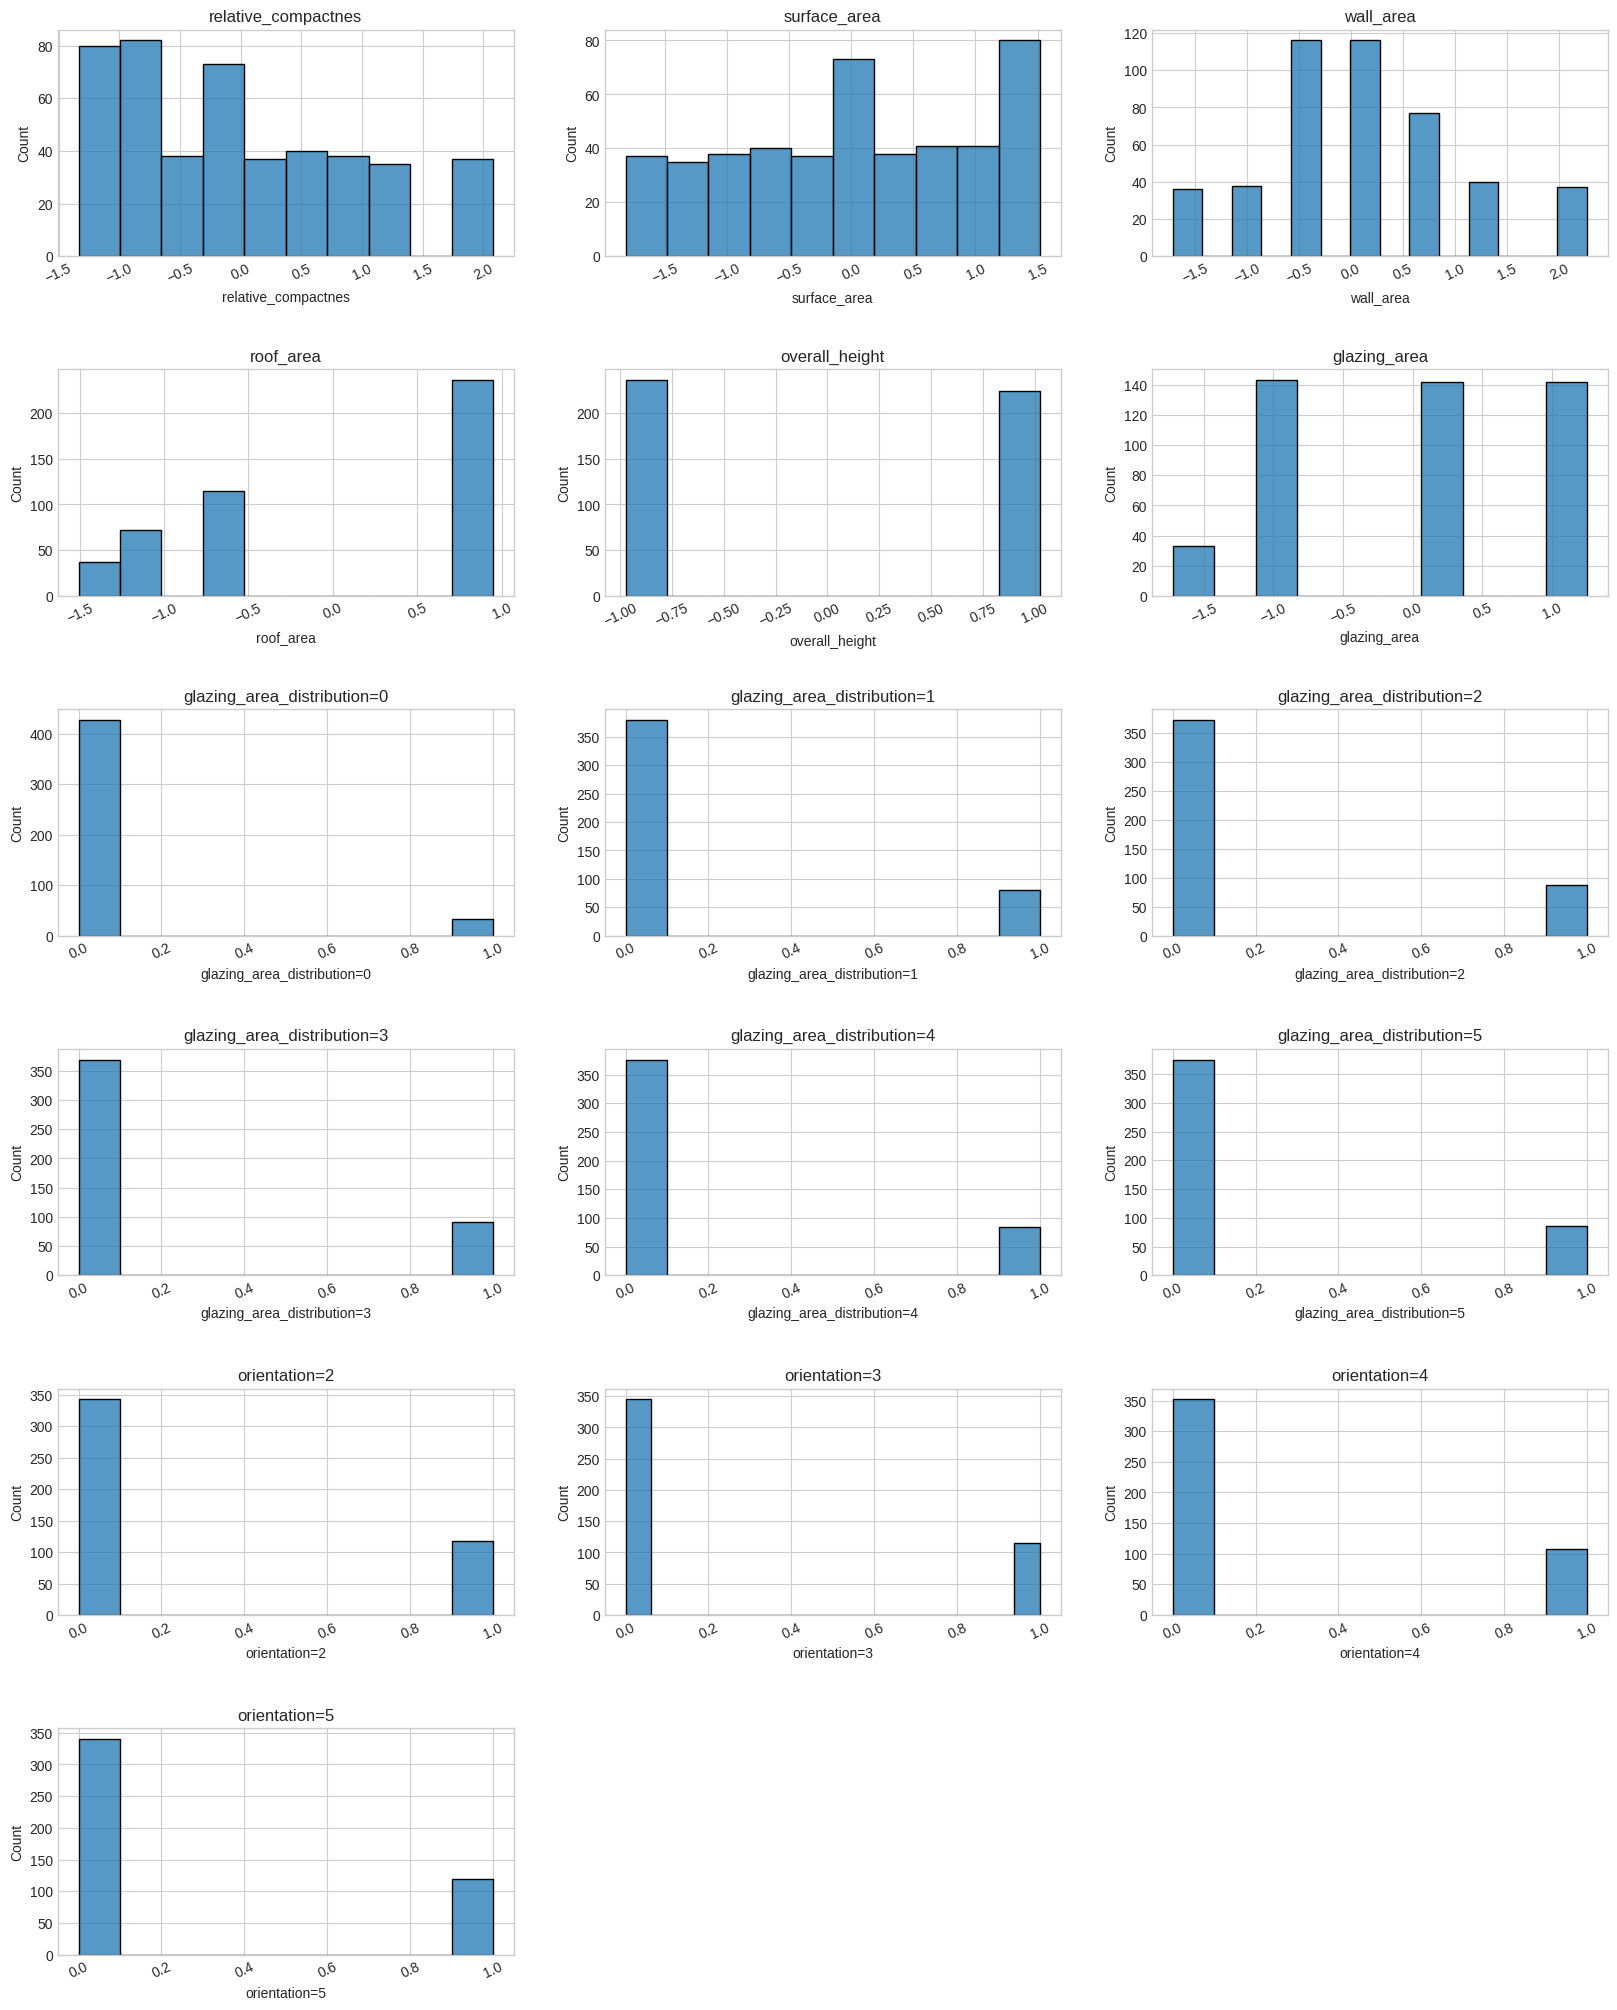

In [32]:
columns = [
    "relative_compactnes",
    "surface_area",
    "wall_area",
    "roof_area",
    "overall_height",
    "glazing_area",
    "glazing_area_distribution=0",
    "glazing_area_distribution=1",
    "glazing_area_distribution=2",
    "glazing_area_distribution=3",
    "glazing_area_distribution=4",
    "glazing_area_distribution=5",
    "orientation=2",
    "orientation=3",
    "orientation=4",
    "orientation=5",
]
df_train = pd.DataFrame(X_train, columns=columns)
plot_distribution(df_train)

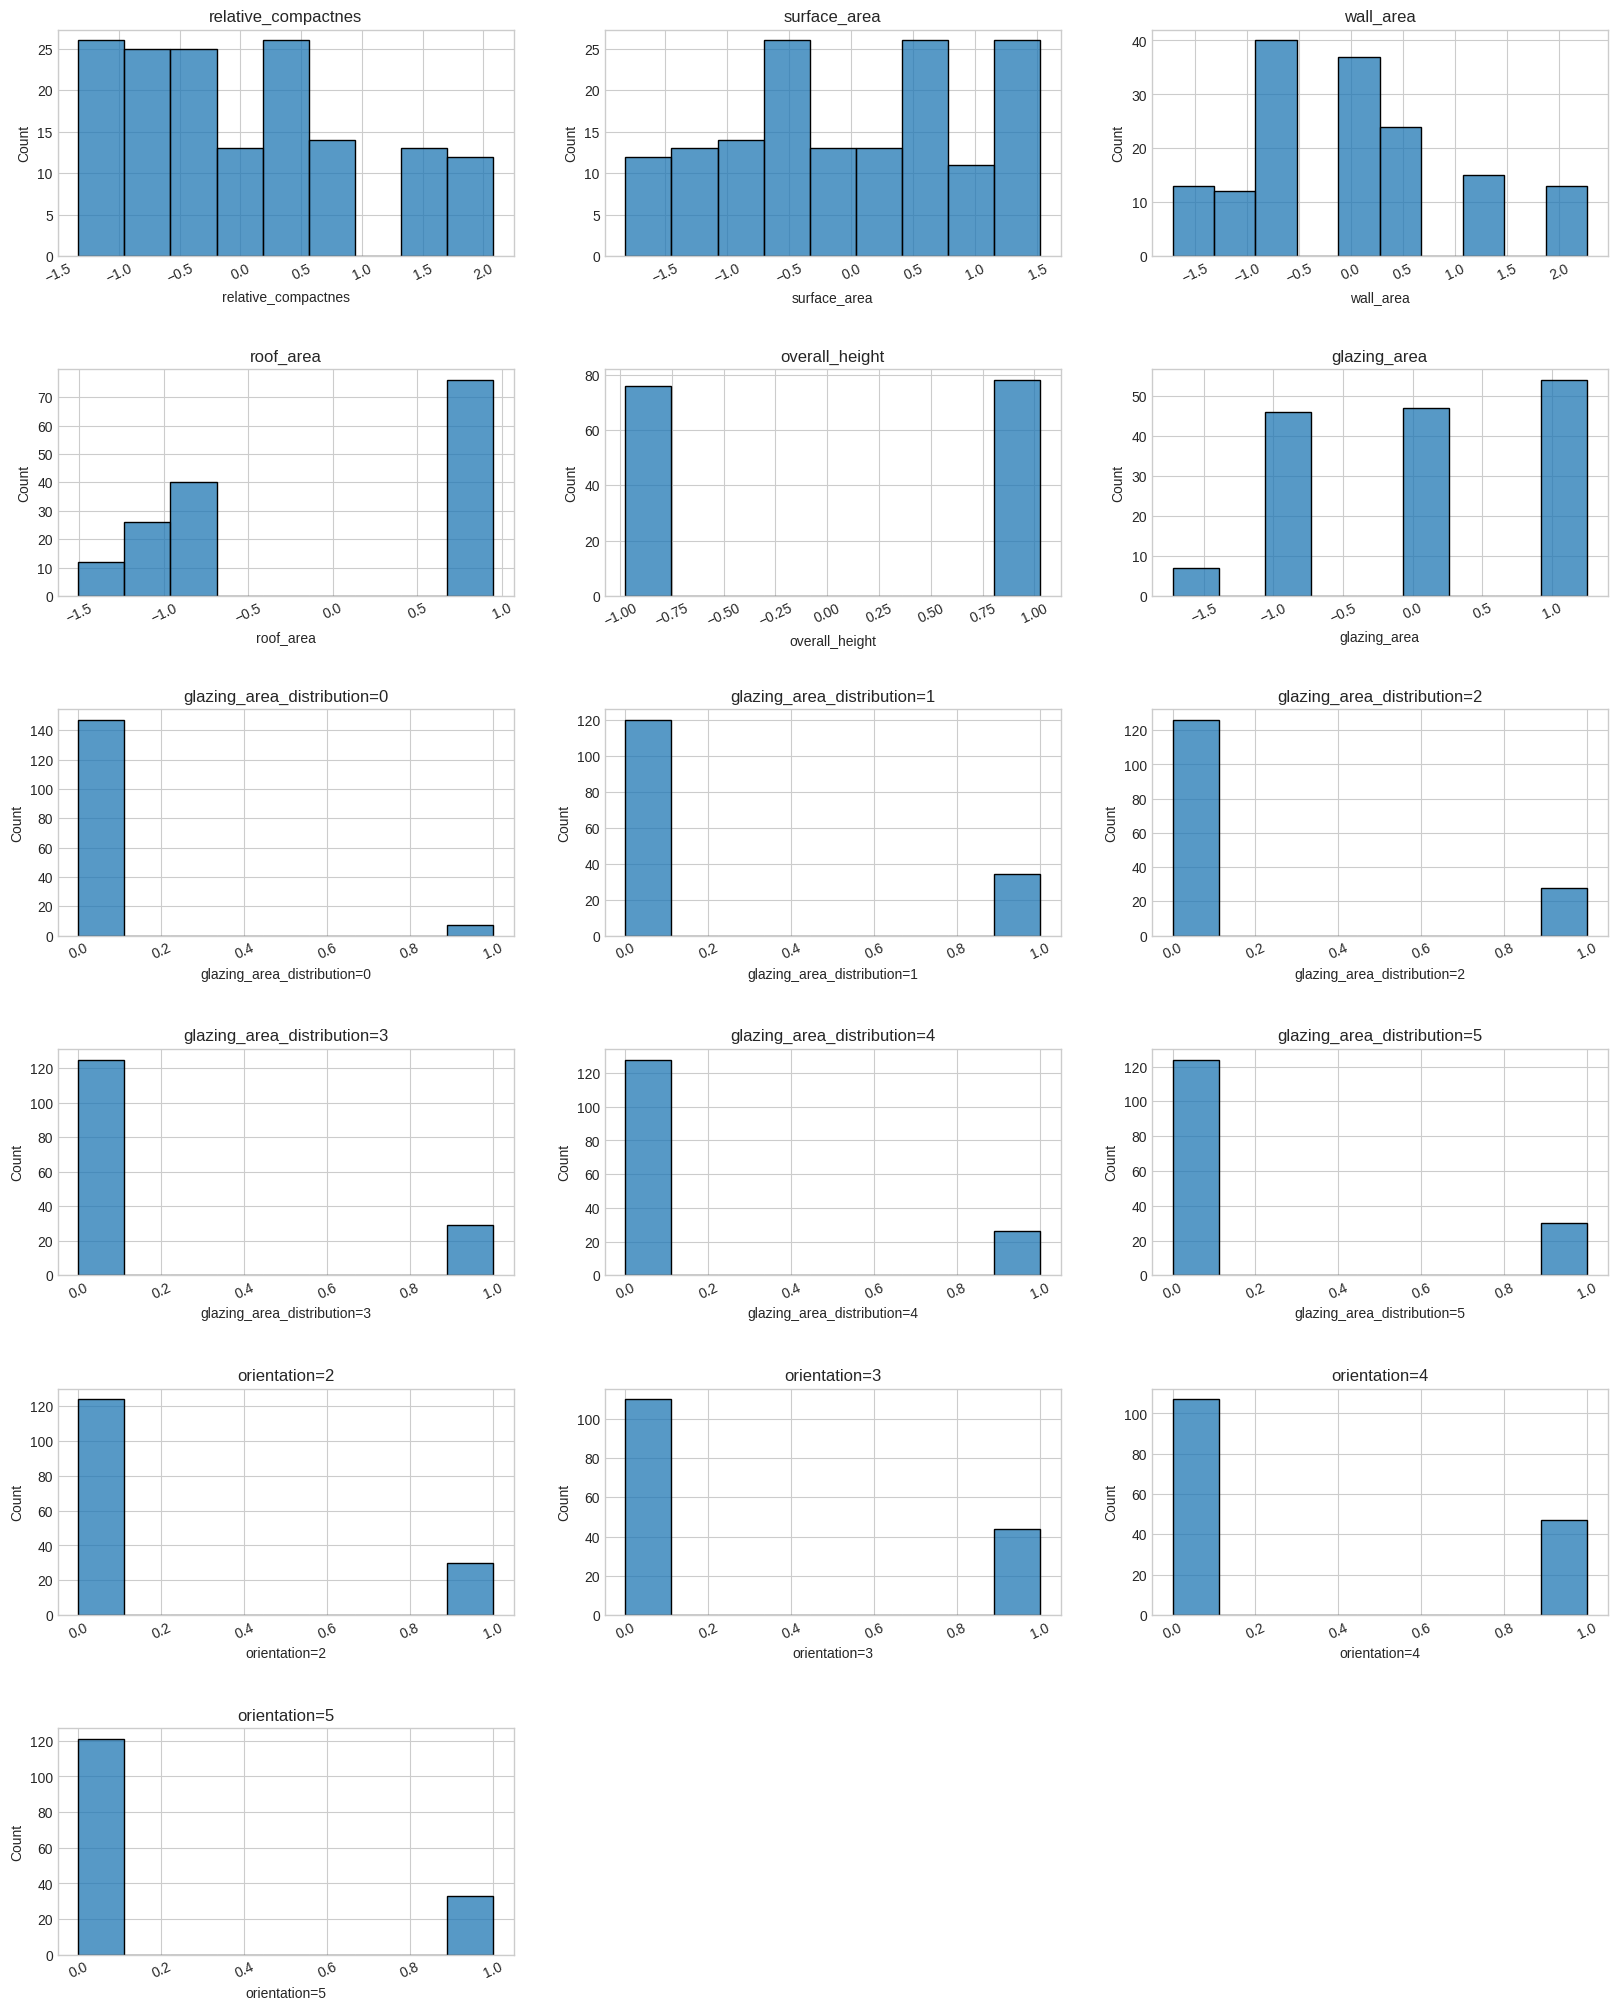

In [33]:
df_val = pd.DataFrame(X_val, columns=columns)
plot_distribution(df_val)

Target data distributions of training and validation set

In [34]:
y_train = data_train[target]
y_val = data_val[target]

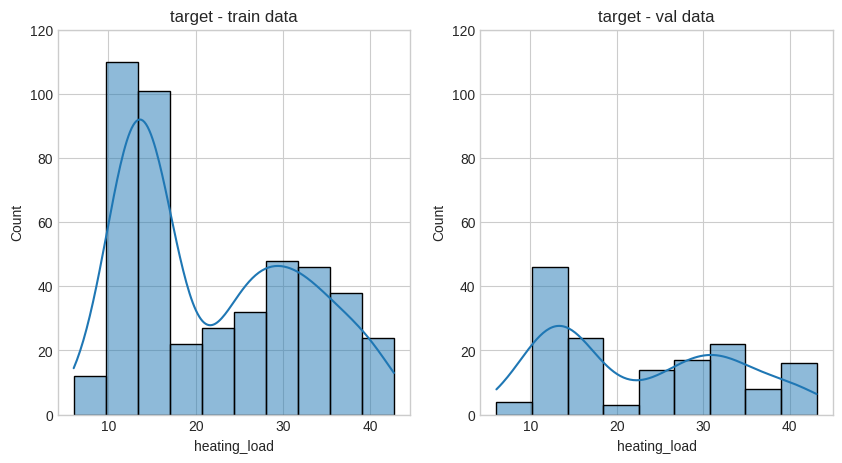

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], x=y_train, kde=True, alpha=0.5)
axes[0].set_title("target - train data")
axes[0].set_ylim(0, 120)
sns.histplot(ax=axes[1], x=y_val, kde=True, alpha=0.5)
axes[1].set_title("target - val data")
axes[1].set_ylim(0, 120);

### Evaluation Metric

Since we are dealing with a regression problem, the primary evaluation metric we will use is the Root Mean Squared Error (RMSE):

The RMSE measures the average deviation between the true target values, denoted as $y_i$, and the corresponding predicted values, denoted as $\hat{y}_i$, for a total of $n$ instances in the dataset. It is calculated using the following formula:

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \big(y_i - \hat{y}_i\big)^2}$

The RMSE metric quantifies the overall accuracy of the regression model by computing the square root of the average squared differences between the true and predicted values. A lower RMSE value indicates a more accurate model, as it signifies a smaller deviation between predicted and actual values.

By employing the RMSE as our evaluation metric, we can effectively assess the performance of the regression model and make informed decisions regarding its suitability for predicting the heating load of buildings.

## Conclusion

With the completion of the above steps, the dataset is now fully prepared for training the regression model. All the necessary data preprocessing, including feature selection, train-test split, data normalization, and one-hot encoding for categorical data, has been performed.

For training the regression model and executing the required preparation steps, you can refer to the script named `train.py`. This script will handle the model training process and ensure that the data is in the appropriate format for accurate predictions.

By following the outlined approach and using the appropriate evaluation metric, the trained model will be capable of making reliable predictions for the heating load of buildings based on the provided dataset.

The combination of meticulous data preparation and well-executed training will contribute to the development of a powerful and effective regression model for energy efficiency analysis.